### Instalacja TensorFlow oraz Keras

In [1]:
!pip3 install tensorflow

You should consider upgrading via the '/Users/gu/.pyenv/versions/3.10.0/bin/python3.10 -m pip install --upgrade pip' command.


### Importowanie wymaganych bibliotek

In [2]:
# Import biblioteki numpy z aliasem 'np'.
# Biblioteka ta jest podstawą do obliczeń naukowych w Pythonie, oferuje wsparcie dla dużych,
# wielowymiarowych tablic i macierzy, wraz z kolekcją funkcji matematycznych do operowania na tych tablicach.
import numpy as np

# Import funkcji 'randint' z modułu 'random'.
# Funkcja ta generuje losową liczbę całkowitą w określonym zakresie, co jest przydatne w losowaniu, symulacjach,
# oraz innych zastosowaniach, gdzie potrzebne są losowe wartości całkowite.
from random import randint

# Import funkcji 'shuffle' z modułu 'sklearn.utils'.
# Funkcja ta losowo miesza kolekcje lub tablice. Jest szczególnie użyteczna w uczeniu maszynowym do mieszania danych
# przed podziałem na zestawy treningowe i testowe, aby usunąć wszelkie błędy, które mogłyby być wprowadzone przez kolejność danych.
from sklearn.utils import shuffle

# Import klasy 'MinMaxScaler' z modułu 'sklearn.preprocessing'.
# Klasa ta skaluje i transformuje cechy do określonego zakresu, zazwyczaj od 0 do 1, lub tak, aby minimalna i maksymalna
# wartość każdej cechy była skalowana do danego zakresu. Normalizacja ta może poprawić wydajność wielu algorytmów uczenia maszynowego.
from sklearn.preprocessing import MinMaxScaler

### Utworzenie dwóch list. Lista dla probek oraz lista dla etykiet

In [3]:
train_labels = []
train_samples = []

Dane testowe:
   - Testowany był eksperymentalny lek na osobach w wieku od 13 do 100 lat w badaniu klinicznym.
   - Badanie miało 2100 uczestników. Połowa była w wieku poniżej 65 lat, połowa 65 lat lub starsza.
   - Około 95% pacjentów w wieku 65 lat lub starszych doświadczyło skutków ubocznych.
   - Około 95% pacjentów poniżej 65 roku życia nie doświadczyło żadnych skutków ubocznych.

In [4]:
for i in range(50):
    # Około ~5% młodszych osób, które doświadczyły skutków ubocznych
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # Około ~5% starszych osób, które nie doświadczyły skutków ubocznych
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # Około ~95% młodszych osób, które nie doświadczyły skutków ubocznych
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # Około ~95% starszych osób, u które doświadczyły skutków ubocznych
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)
    

### Wypisanie zestawu danych

In [5]:
print(train_samples)

[64, 88, 21, 83, 64, 78, 27, 97, 37, 98, 29, 74, 59, 88, 61, 65, 23, 85, 48, 78, 25, 68, 38, 66, 48, 88, 46, 96, 25, 93, 17, 93, 34, 82, 28, 65, 32, 66, 33, 65, 27, 81, 18, 90, 27, 94, 48, 65, 62, 81, 54, 90, 38, 66, 14, 74, 26, 95, 17, 80, 16, 83, 53, 89, 51, 94, 26, 98, 26, 91, 47, 67, 38, 82, 51, 93, 27, 84, 22, 67, 50, 96, 22, 75, 27, 80, 34, 75, 55, 99, 48, 75, 40, 87, 36, 78, 35, 88, 33, 86, 45, 91, 58, 86, 29, 75, 45, 68, 57, 99, 41, 79, 27, 89, 28, 86, 50, 98, 55, 96, 58, 100, 22, 73, 46, 73, 58, 98, 38, 82, 58, 88, 61, 70, 63, 85, 14, 85, 28, 92, 27, 87, 61, 84, 41, 93, 23, 90, 53, 66, 52, 93, 61, 74, 40, 72, 50, 66, 16, 97, 25, 72, 47, 90, 36, 93, 26, 86, 31, 98, 21, 98, 32, 94, 23, 89, 52, 83, 36, 90, 55, 91, 60, 96, 57, 93, 49, 76, 40, 71, 59, 69, 58, 81, 45, 88, 57, 90, 41, 99, 43, 70, 13, 85, 45, 96, 16, 79, 29, 88, 48, 73, 40, 89, 50, 92, 25, 90, 52, 91, 58, 87, 55, 95, 33, 92, 59, 86, 26, 89, 37, 99, 50, 82, 13, 98, 44, 67, 63, 89, 60, 93, 52, 80, 44, 73, 30, 66, 50, 89

In [6]:
print(train_labels)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 

### Przeformatowanie danych do odpowiedniego (oczekiwanego typu danych dla funcji fit)  
[FIT](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit)

In [7]:
# Przekształcenie w tablice NumPy
train_labels = np.array(train_labels)
# Przekształcenie w tablice NumPy
train_samples = np.array(train_samples)
# Użycie funcji losowania do przekształcenia  wyszkolonych etykiet oraz wyszkolonych próbek
# względem siebie w celu pozbycia sie narzuconego porządku z procesu generowania danych
train_labels, train_samples = shuffle(train_labels, train_samples)

### Wypisanie przeformatowanych danych (oczekiwanych przez fit)

In [8]:
print(train_labels)
print(train_samples)

[0 1 0 ... 1 0 1]
[43 28 34 ... 98 58 96]


### Istnieje inny powód dla, którego chcemy przeprowadzić dalsze przetwarzanie

![Normalizacja i standaryzacja](normalizacja,standaryzacja.png "Normalizacja i standaryzacja")  
Chodzi o normalizację lub standaryzację - dzięki temu uczenie sieci neuronowych moze stać się szybsz i wydajniejsze


### Użycie obiektu skalarnego min max do utworzenia zakresu funkcji od 0 do 1

In [9]:
# Tworzenie instancji klasy MinMaxScaler. Ten scaler normalizuje dane tak, aby każda cecha (kolumna danych)
# miała wartości w określonym zakresie, tutaj od 0 do 1. Jest to przydatne w uczeniu maszynowym, ponieważ
# wiele algorytmów działa lepiej, gdy cechy są skalowane w ten sposób.
scaler = MinMaxScaler(feature_range=(0,1))

### Przekształcenie skali od 13 do 100 w skalę od 0 do 1

Fukcja transformacji dopasowania domyślnie nie akceptuje danych jednego "D" - więc jest tutaj tylko formalnością
Ponieważ nasze dane są jednowymiarowe to musimy je przekształcić właśnie w taki sposób aby użyć funkcji transformacji dopasowania

In [10]:
# Stosowanie metody fit_transform klasy MinMaxScaler do danych treningowych. Metoda 'fit_transform' najpierw dopasowuje scaler 
# do danych (obliczając minimalne i maksymalne wartości cech), a następnie transformuje te dane do określonego zakresu (0,1).
# Operacja 'reshape(-1,1)' zmienia kształt tablicy 'train_samples' na 2-wymiarową (kolumnową), co jest wymagane przez scaler.
# W wyniku tej operacji, 'scaled_train_samples' zawiera przeskalowane wartości próbek treningowych, które są teraz gotowe
# do wykorzystania w algorytmach uczenia maszynowego.
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))


### Wyświetlenie przetransformowanych danych (skalowane dane) wachające się od 0 do 1

In [11]:
print(scaled_train_samples)

[[0.34482759]
 [0.17241379]
 [0.24137931]
 ...
 [0.97701149]
 [0.51724138]
 [0.95402299]]


# TRENOWANIE SZTUCZNEJ SIECI NEURONOWEJ ORAZ MODELU SEKWENCYJNEGO

### Importowanie modułów TensorFlow, które będą używane do zbudowania pierwszego modelu

In [12]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Importowanie modułu tensorflow pod aliasem tf.
# TensorFlow to biblioteka do obliczeń numerycznych, która umożliwia efektywne trenowanie i implementację modeli uczenia maszynowego
# na różnych platformach, od prostych urządzeń do skomplikowanych klastrów serwerów.
import tensorflow as tf

# Importowanie modułu keras z pakietu tensorflow.
# Keras to API wysokiego poziomu do budowania i trenowania modeli głębokiego uczenia, które jest zintegrowane z TensorFlow,
# ułatwiające szybkie prototypowanie i eksperymentowanie.
from tensorflow import keras

# Importowanie klasy Sequential z modułu tensorflow.keras.models.
# Sequential to rodzaj modelu w Keras, który jest liniowym stosunkiem warstw, gdzie każda warstwa ma dokładnie jeden wejściowy tensor
# i jeden wyjściowy tensor, co ułatwia tworzenie prostych architektur.
from tensorflow.keras.models import Sequential

# Importowanie funkcji Activation i klasy Dense z modułu tensorflow.keras.layers.
# Activation to warstwa, która stosuje funkcję aktywacji do wyjścia poprzedniej warstwy.
# Dense to standardowa warstwa sieci neuronowej, która jest gęsto połączona, co oznacza, że każdy neuron wejściowy
# jest połączony z każdym neuronem wyjściowym.
# Input to funkcja używana do definiowania warstwy wejściowej modelu. Pozwala określić kształt danych wejściowych,
# który jest wymagany przez sieć, w tym liczbę cech, które sieć będzie przetwarzać. Jest to kluczowy element
# przy budowaniu modeli w Keras, gdyż definiuje punkt wejścia danych do modelu.
from tensorflow.keras.layers import Activation, Dense, Input

# Importowanie klasy Adam z modułu tensorflow.keras.optimizers.
# Adam to algorytm optymalizacji, który może być używany do aktualizacji wag sieci neuronowych na podstawie danych treningowych.
from tensorflow.keras.optimizers import Adam

# Importowanie funkcji categorical_crossentropy z modułu tensorflow.keras.metrics.
# Categorical_crossentropy to funkcja straty, która jest często używana w zadaniach klasyfikacji, gdzie etykiety są kodowane jako wektory jedno gorące.
from tensorflow.keras.metrics import categorical_crossentropy


### Jeżeli mamy procesor graficzny zostanie on wykryty i dodany do konfiguracji

In [14]:
# Wylistowanie dostępnych fizycznych urządzeń typu GPU za pomocą TensorFlow.
# Ta funkcja pozwala na zidentyfikowanie wszystkich dostępnych GPU w systemie, co jest przydatne, gdy chcemy skonfigurować TensorFlow
# do korzystania z określonych urządzeń sprzętowych.
physical_devices = tf.config.experimental.list_physical_devices('GPU')

# Sprawdzanie, czy jakiekolwiek GPU są dostępne
if physical_devices:
    # Jeśli GPU są dostępne, ustaw wzrost pamięci na pierwszym dostępnym GPU.
    # Wzrost pamięci oznacza, że TensorFlow nie zajmie całej dostępnej pamięci na GPU od razu, ale będzie zwiększał jej użycie
    # w miarę potrzeby. Jest to przydatne, aby uniknąć konfliktów z innymi procesami, które mogą potrzebować GPU.
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

    # Wypisanie liczby dostępnych GPU.
    print("Num GPUs Available: ", len(physical_devices))
else:
    # Jeśli nie ma dostępnych GPU, również wypisanie tej informacji.
    print("Num GPUs Available: ", len(physical_devices))


Num GPUs Available:  0


### Budowanie najprostszego modelu z użyciem Keras (sekwencyjny model)  
Można go opisać jako liniowy stos warstw  
![Model](warstwy1.png "Model") 

In [15]:
# Inicjalizacja modelu jako instancja klasy sekwencyjnej.
# Model sekwencyjny to liniowy stos warstw, gdzie kolejność dodawania warstw odzwierciedla przepływ danych.
model = Sequential(
    [
        # Pierwsza warstwa definiująca kształt wejściowy.
        # Specyfikacja 'shape=(1,)' oznacza, że każdy wejściowy przykład danych będzie miał 1 cechę.
        Input(shape=(1,)),
        
        # Pierwsza warstwa gęsta z 16 neuronami, funkcja aktywacji ReLU.
        # 'ReLU' (Rectified Linear Unit) jest popularną funkcją aktywacji stosowaną w sieciach neuronowych,
        # która sprawia, że wszystkie wartości wejściowe mniejsze od zera są zerowane.
        Dense(units=16, activation='relu'),
        
        # Druga warstwa gęsta z 32 neuronami, funkcja aktywacji ReLU.
        # Więcej neuronów i kolejna warstwa ReLU zwiększają zdolność modelu do uczenia się skomplikowanych wzorców w danych.
        Dense(units=32, activation='relu'),
        
        # Warstwa wyjściowa z 2 jednostkami, funkcja aktywacji softmax.
        # Softmax sprawia, że wyjścia są interpretowane jako prawdopodobieństwa przynależności do jednej z dwóch klas.
        # Jest to typowa konfiguracja dla zadań klasyfikacyjnych z dwoma klasami wynikowymi.
        Dense(units=2, activation='softmax')
    ]
)

In [16]:
# Wywołanie metody summary() na obiekcie modelu.
# Metoda summary() wyświetla podsumowanie architektury modelu, w tym nazwy warstw, ich kształty (wymiary),
# oraz liczbę parametrów (zarówno trenowalnych, jak i nietrenowalnych) w każdej warstwie.
# Jest to przydatne narzędzie do szybkiego przeglądu struktury modelu i sprawdzenia, czy wszystkie warstwy są prawidłowo zdefiniowane.
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

#### Właśnie stworzyliśmy sztuczną sieć neuronową oraz intuicyjny typ modelu sekwencyjnego

# SZKOLENIE / TRENOWANIE SIECI NEURONOWEJ

#### Wykonanie funkcji kompilacji modelu - przygotuje to model do treningu zanim będziemy mogli model faktycznie wytrenować

In [17]:
# Określenie dla funkcji kompilacji jakiego optimizera chcemy użyć (Adam).
# Podajemy decyzje dot. użycia atomu optimalizatora z szybkością uczenia się (0.0001) jest on bardzo popularny
# Określamy typ straty (sparse_categorical_crossentropy)
# Określamy jakie metryki chcemy zobaczyć. Dotyczy to tylko wydajności modelu (na podstawie czego chcemy móc ocenić nasz model)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Trenowanie modelu ma miejsce za każdym razem gdy wywołujemy funkcję dopasowania (fit)
# Określenie parametru x - czyli nasze dane wejściowe (obecnie przechowywane w skalowalnej zmiennej próbek)
# Określenie parametru y - czyli nasze dane docelowe (obecnie przechowywane w zmiennej etykiet)
# Określenie wielkości partii, którą chcemy wykorzystać do szkolenia (batch_size) - ile próbek znajduje się w jednej partii, 
#                                  sktóre mają zostać przesłane i przetworzone przez sieci neuronowe jednocześnie (10)
# Ilość epok - oznacza to, że model będzie przetwarzał lub trenował wszystkie dane ze zbioru danych 30 razy przed zakończeniem 
#                                  całego procesu szkoleniowego
# Shuffle, które ustawiamy na True (domyślnie jest ustawione na True - chodzi o pokazanie, że takie ustawienie jest) - ten parametr oznacza
#                                  że dane są domyslnie tasowane (to dobrze bo chcemy wymazać porządek danych przed przekazaniem 
#                                  danych do modelu - model nie bedzie się więc uczył czegokolwiek na temat kolejności danych).
# Ostatni parametr to opcja pozwalająca zobaczyć dane wejsciowe za każdym razem, gdy uruchamiamy tę komendę funkcji dopasowania (fit).
#                                  Możemy go ustawić na 1 lub 2. 2 to najbardziej szczegółowy poziom pod względem komunikatów wejściowych.


model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 0s - 1ms/step - accuracy: 0.4676 - loss: 0.7015
Epoch 2/30
210/210 - 0s - 203us/step - accuracy: 0.5719 - loss: 0.6643
Epoch 3/30
210/210 - 0s - 208us/step - accuracy: 0.7124 - loss: 0.6204
Epoch 4/30
210/210 - 0s - 216us/step - accuracy: 0.7862 - loss: 0.5738
Epoch 5/30
210/210 - 0s - 209us/step - accuracy: 0.8090 - loss: 0.5323
Epoch 6/30
210/210 - 0s - 213us/step - accuracy: 0.8410 - loss: 0.4930
Epoch 7/30
210/210 - 0s - 215us/step - accuracy: 0.8624 - loss: 0.4579
Epoch 8/30
210/210 - 0s - 214us/step - accuracy: 0.8671 - loss: 0.4273
Epoch 9/30
210/210 - 0s - 209us/step - accuracy: 0.8814 - loss: 0.4002
Epoch 10/30
210/210 - 0s - 210us/step - accuracy: 0.8981 - loss: 0.3774
Epoch 11/30
210/210 - 0s - 208us/step - accuracy: 0.9043 - loss: 0.3581
Epoch 12/30
210/210 - 0s - 205us/step - accuracy: 0.9105 - loss: 0.3420
Epoch 13/30
210/210 - 0s - 208us/step - accuracy: 0.9129 - loss: 0.3291
Epoch 14/30
210/210 - 0s - 204us/step - accuracy: 0.9224 - loss: 0.3184
Epo

#### Dodanie poziomu walidujacego  
Zestaw walidacyjny w kontekście uczenia maszynowego to podzbiór danych, który jest używany do oceny wydajności modelu podczas procesu trenowania.   
Dane są typowo podzielone na trzy zestawy:

 - Zestaw treningowy: Wykorzystywany do nauczenia modelu. Wagi modelu są aktualizowane w oparciu o te dane.  
 - Zestaw walidacyjny: Używany do regulacji parametrów modelu, takich jak architektura sieci neuronowej lub parametry algorytmów uczenia. Pozwala to na ocenę jakości modelu na danych, które nie zostały użyte podczas treningu, co pomaga wykryć i zapobiec problemowi nadmiernego dopasowania (ang. overfitting). Nadmierne dopasowanie występuje, gdy model jest zbyt skomplikowany i nauczy się specyfiki danych treningowych, zamiast ogólnych trendów, przez co gorzej sprawdza się na nowych danych.  
 - Zestaw testowy: Wykorzystywany do oceny końcowej wydajności modelu po zakończeniu procesu trenowania i walidacji. Jak zestaw walidacyjny, powinien składać się z danych, które nie były wykorzystywane podczas trenowania modelu.

In [19]:
# x=scaled_train_samples określa dane wejściowe do trenowania, które zostały przeskalowane wcześniej.
# y=train_labels określa prawdziwe etykiety dla danych treningowych.
# validation_split=0.1 wskazuje, że 10% danych treningowych powinno być użyte jako zestaw walidacyjny.
# batch_size=10 określa liczbę próbek, które będą przetwarzane w pojedynczej partii.
# epochs=30 ustawia liczbę epok treningowych, czyli ile razy cały zestaw danych przejdzie przez sieć neuronową.
# shuffle=True wskazuje, że dane treningowe powinny być tasowane przed każdą epoką.
# verbose=2 określa, jak wiele informacji o procesie trenowania powinno być wyświetlane (2 oznacza, 
#                                                    że zostanie wyświetlony jeden wiersz na epokę).
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - 413us/step - accuracy: 0.9397 - loss: 0.2594 - val_accuracy: 0.9286 - val_loss: 0.2982
Epoch 2/30
189/189 - 0s - 251us/step - accuracy: 0.9423 - loss: 0.2581 - val_accuracy: 0.9286 - val_loss: 0.2992
Epoch 3/30
189/189 - 0s - 254us/step - accuracy: 0.9429 - loss: 0.2570 - val_accuracy: 0.9286 - val_loss: 0.2986
Epoch 4/30
189/189 - 0s - 259us/step - accuracy: 0.9423 - loss: 0.2559 - val_accuracy: 0.9286 - val_loss: 0.2983
Epoch 5/30
189/189 - 0s - 251us/step - accuracy: 0.9413 - loss: 0.2548 - val_accuracy: 0.9286 - val_loss: 0.2975
Epoch 6/30
189/189 - 0s - 251us/step - accuracy: 0.9407 - loss: 0.2539 - val_accuracy: 0.9286 - val_loss: 0.2987
Epoch 7/30
189/189 - 0s - 248us/step - accuracy: 0.9407 - loss: 0.2532 - val_accuracy: 0.9286 - val_loss: 0.2989
Epoch 8/30
189/189 - 0s - 248us/step - accuracy: 0.9423 - loss: 0.2523 - val_accuracy: 0.9286 - val_loss: 0.2991
Epoch 9/30
189/189 - 0s - 249us/step - accuracy: 0.9429 - loss: 0.2517 - val_accuracy: 0.9286 - 

#### Komentarz do wyniku modelu  
- **581/581**: Oznacza, że podczas tej epoki przetrenowano 581 partii (batchy) danych. Jest to liczba wszystkich partii, na które podzielono dane treningowe.  
- **0s**: Wskazuje, że czas przetwarzania tej epoki był bardzo krótki, zanotowano go jako 0 sekund. To może oznaczać, że trening był bardzo szybki lub czas nie został zmierzony dokładnie.  
- **215us/step**: Średni czas przetwarzania jednego kroku (batcha) w mikrosekundach (1 mikrosekunda = 1/1,000,000 sekundy). Wskazuje to na bardzo szybki czas treningu dla każdego kroku.  
- **accuracy: 0.9283**: Dokładność (accuracy) modelu na danych treningowych wynosiła około 92.83%. To miara, która określa, jaki procent próbek został sklasyfikowany poprawnie.  
- **loss: 0.2580**: Wartość funkcji straty (loss) na danych treningowych wynosiła 0.2580. Funkcja straty mierzy, jak dobrze model radzi sobie z zadaniem podczas treningu; im niższa wartość, tym lepiej.  
- **val_accuracy: 0.9457**: Dokładność modelu na zestawie walidacyjnym wynosiła około 94.57%. Jest to wysoka wartość, co sugeruje, że model dobrze generalizuje na danych, których nie widział podczas treningu.  
- **val_loss: 0.2144**: Wartość funkcji straty na zestawie walidacyjnym wynosiła 0.2144. Jest niższa niż funkcja straty dla danych treningowych, co również jest dobrym znakiem.  


### Predykcja

In [20]:
# 'predictions' to zmienna, która będzie przechowywać wyniki przewidywań modelu.
# Metoda 'predict' modelu z Keras zostanie użyta do wygenerowania przewidywań.
# 'x=scaled_train_samples' wskazuje, że jako dane wejściowe dla przewidywań użyte będą 'scaled_train_samples',
# które są przeskalowanymi próbkami treningowymi.
# 'batch_size=10' określa, że przewidywania będą generowane partiami po 10 próbek. Jest to szczególnie ważne
# przy przetwarzaniu dużych zbiorów danych, ponieważ pomaga to zmniejszyć zużycie pamięci.
# 'verbose=0' oznacza, że podczas wykonywania metody 'predict' nie będą wyświetlane żadne wiadomości
# (poziom szczegółowości logowania jest ustawiony na 0, co oznacza brak wyjścia).
predictions = model.predict(x=scaled_train_samples, batch_size=10, verbose=0)

In [21]:
for i in predictions:
    print(i)

[0.9660689  0.03393115]
[0.9745107 0.0254892]
[0.97452134 0.02547865]
[0.372211 0.627789]
[0.97083944 0.02916055]
[0.4767332  0.52326685]
[0.02466022 0.97533983]
[0.9729111  0.02708884]
[0.20069438 0.7993056 ]
[0.97263545 0.02736463]
[0.01330828 0.98669165]
[0.95786715 0.04213277]
[0.05376451 0.94623554]
[0.1432867  0.85671324]
[0.03205603 0.967944  ]
[0.04157535 0.9584246 ]
[0.1432867  0.85671324]
[0.9745107 0.0254892]
[0.07529896 0.9247011 ]
[0.93844515 0.06155486]
[0.02068729 0.9793127 ]
[0.08882502 0.911175  ]
[0.1432867  0.85671324]
[0.9731635  0.02683653]
[0.94561404 0.05438604]
[0.97415    0.02584998]
[0.9741325  0.02586753]
[0.97498417 0.02501578]
[0.03813463 0.9618654 ]
[0.12258316 0.87741685]
[0.95786715 0.04213277]
[0.03496826 0.9650318 ]
[0.04531191 0.9546882 ]
[0.8861874  0.11381264]
[0.05376451 0.94623554]
[0.1432867  0.85671324]
[0.09638105 0.903619  ]
[0.42361802 0.576382  ]
[0.9733373 0.0266627]
[0.01330828 0.9866917 ]
[0.01330828 0.98669165]
[0.7272842 0.2727158]
[0.9

In [22]:
# Zastosowanie funkcji 'argmax' z biblioteki NumPy na wynikach przewidywań (predictions) modelu.
# Funkcja 'argmax' zwraca indeksy największych wartości wzdłuż podanej osi, co jest przydatne
# w przypadku modeli klasyfikacji, gdzie przewidywania są zwracane jako zestaw prawdopodobieństw
# przynależności do poszczególnych klas. W tym kontekście, argmax zostanie użyte do wybrania
# indeksu o najwyższym prawdopodobieństwie, który odpowiada przewidywanej klasie.
# 'axis=1' oznacza, że szukamy indeksów największych wartości w wierszach, nie kolumnach,
# co odpowiada wyborowi klasy z listy prawdopodobieństw dla każdej próbki.
rounded_predictions = np.argmax(predictions, axis=-1)

In [23]:
for i in rounded_predictions:
    print(i)

0
0
0
1
0
1
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
1
1
0
0
0
0
0
1
1
0
1
1
0
1
1
1
1
0
1
1
0
0
1
0
1
1
1
0
1
0
0
0
1
0
1
1
1
1
1
0
0
1
0
1
1
0
1
1
0
1
1
0
1
1
0
0
0
1
1
0
0
0
0
1
0
0
1
0
1
1
1
1
1
0
0
1
1
0
1
0
0
1
0
1
1
0
0
0
0
1
0
0
0
1
1
0
0
0
1
1
1
1
0
1
0
0
1
0
1
0
1
1
0
1
1
1
0
1
0
1
1
1
1
1
1
0
1
1
1
1
0
1
1
0
1
0
1
0
1
0
0
1
1
0
0
0
0
0
0
1
0
1
0
1
1
0
0
1
1
0
1
1
0
0
0
1
0
1
1
1
1
0
1
1
1
1
0
0
1
0
1
0
0
0
0
1
1
0
1
1
1
0
1
1
0
1
1
0
0
1
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
1
0
0
1
0
1
1
0
1
0
0
0
1
0
0
0
1
0
1
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
1
1
1
0
0
0
1
1
1
1
0
0
1
1
1
0
0
0
1
1
0
0
1
1
0
1
1
1
1
0
0
0
1
1
1
1
1
1
1
0
0
1
1
0
1
0
1
1
0
0
1
1
0
0
1
1
1
0
1
0
1
1
1
0
0
0
1
1
1
1
0
1
1
1
0
1
0
1
1
0
0
1
1
0
1
1
0
0
0
0
1
1
0
0
0
0
1
0
0
0
1
1
0
1
1
0
0
0
1
1
1
0
1
1
0
0
1
0
1
0
1
0
1
0
0
1
1
0
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
0
0
1
1
1
0
0
1
0
0
0
0
1
0
1
1
0
1
1
1
1
0
1
0
0
1
0
1
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
0
0
0
1
0
1
1
0
0
1
1
1
1
0
1
0
0
0
1
1
1
0
0
0
1
1
0
1
1
0
0
1
1
0
0
0
1
0
0
0
1
0


### Macierz błędów

In [29]:
# Włączenie integracji matplotlib z notatnikiem Jupyter, pozwalające na wyświetlanie wykresów bezpośrednio pod komórkami kodu.
%matplotlib inline

# Importowanie funkcji confusion_matrix z modułu sklearn.metrics.
# Confusion matrix (macierz błędów) to narzędzie do oceny wydajności modelu klasyfikacyjnego,
# prezentujące liczby predykcji dla każdej klasy w stosunku do rzeczywistych etykiet.
from sklearn.metrics import confusion_matrix

# Importowanie modułu itertools, który oferuje różne funkcje pomocnicze optymalizujące
# iteracyjne zadania (takie jak produkty kartezjańskie, permutacje, kombinacje itp.).
import itertools

# Importowanie biblioteki matplotlib.pyplot jako plt.
# Matplotlib to biblioteka do tworzenia statycznych, interaktywnych wykresów i wizualizacji w Pythonie.
import matplotlib.pyplot as plt

# Obliczanie macierzy błędów na podstawie rzeczywistych etykiet i przewidzianych przez model.
# 'y_true' to rzeczywiste etykiety, a 'rounded_predictions' to etykiety przewidziane przez model.
# Wynik, 'cm', jest dwuwymiarową tablicą, gdzie indeksy wierszy oznaczają rzeczywiste klasy,
# a indeksy kolumn wskazują przewidywane klasy.
cm = confusion_matrix(y_true=train_labels, y_pred=rounded_predictions)


In [30]:
# Definicja funkcji plot_confusion_matrix z parametrami: macierz błędów (cm), lista nazw klas, flaga normalizacji,
# tytuł wykresu i mapa kolorów.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Macierz pomyłek',
                          cmap=plt.cm.Blues):

    # Wieloliniowy komentarz dokumentujący funkcję, opisujący jej działanie i parametry.
    """
    To funkcja drukuje i wyświetla macierz pomyłek.
    Normalizację można zastosować, ustawiając normalize=True.
    """
    
    # Wyświetlenie macierzy pomyłek jako obrazu z wykorzystaniem mapy kolorów cmap.
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Ustawienie tytułu wykresu.
    plt.title(title)
    
    # Dodanie paska kolorów (colorbar), który pokazuje zakres wartości reprezentowanych przez kolory na mapie.
    plt.colorbar()
    
    # Ustalenie pozycji, na których mają być wyświetlane etykiety (tutaj dla klas).
    tick_marks = np.arange(len(classes))
    
    # Ustawienie etykiet osi X z nazwami klas, obrót etykiet o 45 stopni dla lepszej czytelności.
    plt.xticks(tick_marks, classes, rotation=45)
    
    # Ustawienie etykiet osi Y z nazwami klas.
    plt.yticks(tick_marks, classes)
    
    # Warunek sprawdzający, czy użytkownik chce znormalizować macierz pomyłek.
    if normalize:
        # Normalizacja wartości macierzy pomyłek, dzielenie każdego wiersza przez sumę wartości w wierszu,
        # przekształcając liczby w prawdopodobieństwa.
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # Wydrukowanie informacji o normalizacji.
        print("Znormalizowana macierz pomyłek")
    else:
        # Wydrukowanie informacji, że macierz nie jest normalizowana.
        print('Macierz pomyłek, bez normalizacji')
    
    # Wydrukowanie wartości macierzy pomyłek w konsoli.
    print(cm)
    
    # Ustalenie progu dla decyzji o kolorze tekstu na podstawie maksymalnej wartości w macierzy.
    thresh = cm.max() / 2.
    
    # Iterowanie przez elementy macierzy (indeksy i wartości), aby dodać teksty do każdego pola macierzy.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Dodanie tekstu do każdego pola macierzy, gdzie tekst jest sformatowany jako liczba zmiennoprzecinkowa
        # z dwoma miejscami po przecinku. Ustawienie tekstu na środku pola.
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 # Ustawienie koloru tekstu na biały, jeśli wartość jest większa niż połowa maksimum,
                 # w przeciwnym przypadku kolor czarny dla lepszej czytelności.
                 color="white" if cm[i, j] > thresh else "black")
    
    # Ajustowanie układu elementów na wykresie, by wszystkie elementy były dobrze widoczne i nie nakładały się na siebie.
    plt.tight_layout()
    
    # Dodanie etykiety osi Y opisującej, co reprezentują wartości na tej osi (prawdziwe klasy).
    plt.ylabel('Prawdziwa etykieta')
    
    # Dodanie etykiety osi X opisującej, co reprezentują wartości na tej osi (przewidziane klasy).
    plt.xlabel('Przewidziana etykieta')



Znormalizowana macierz pomyłek
[[0.92952381 0.07047619]
 [0.04571429 0.95428571]]


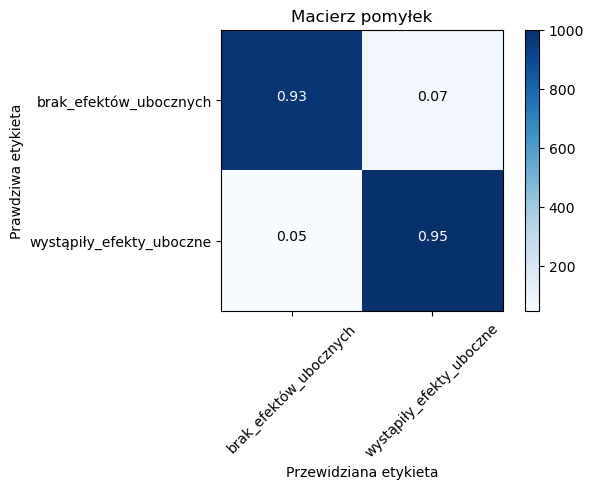

In [31]:
# Etykiety do wykorzystania na osiach wykresu macierzy pomyłek
cm_plot_labels = ['brak_efektów_ubocznych', 'wystąpiły_efekty_uboczne']
# Wywołanie funkcji do rysowania macierzy pomyłek z odpowiednimi parametrami
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Macierz pomyłek', normalize=True)

[Link do Video na Youtube](https://www.youtube.com/watch?v=qFJeN9V1ZsI)

### Zapisywanie modelu

In [32]:
# Najpierw sprawdza, czy plik już istnieje.
# Jeśli nie, model jest zapisywany na dysku.
import os.path
# Ten format pliku jest uważany za przestarzały (Jeżeli odkomentujesz if to pamiętaj o wcięciach ciala if)
# if os.path.isfile('models/medical_trial_model.h5') is False:
model.save('models/medical_trial_model.h5')
# Ten format pliku jest aktualny (Jeżeli odkomentujesz if to pamiętaj o wcięciach ciala if)
# if os.path.isfile('models/my_model.keras') is False:
model.save('models/my_model.keras')

Funkcja zapisu zachowuje:

- Architekturę modelu, umożliwiając jego ponowne stworzenie.
- Wagi modelu.
- Konfigurację treningu (stratę, optymalizator).
- Stan optymalizatora, pozwalając na wznowienie treningu dokładnie w miejscu, w którym został przerwany.

### Wczytywanie modelu

In [33]:
# Importowanie funkcji load_model z modułu tensorflow.keras.models.
# Funkcja ta jest używana do ładowania wytrenowanego modelu z pliku, co pozwala na ponowne użycie modelu bez potrzeby ponownego trenowania.
from tensorflow.keras.models import load_model

# Ładowanie modelu z pliku znajdującego się w lokalizacji 'models/medical_trial_model.h5'.
# Ścieżka do pliku wskazuje na plik w formacie HDF5, który jest standardowym formatem zapisywania modeli w Keras.
# Zmienna 'new_model' przechowuje obiekt modelu, który może być używany do predykcji, oceny lub dalszego trenowania.
new_model = load_model('models/medical_trial_model.h5')

In [34]:
# Podsumowanie modelu, wyświetla informacje o warstwach i parametrach
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644 (2.52 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [35]:
# Pobieranie wag modelu, zwraca listę numpy arrays zawierających wagi dla każdej warstwy
new_model.get_weights()

[array([[-0.276983  ,  0.5171685 ,  0.6133553 , -0.39589405,  0.29611158,
         -0.04429239, -0.5726961 , -0.22302866,  0.4265142 , -0.08382899,
          0.0348573 ,  0.71206874, -0.00429722,  0.31893003, -0.3567379 ,
          0.5022199 ]], dtype=float32),
 array([ 0.        , -0.17718782, -0.17967051,  0.        , -0.00477206,
         0.        ,  0.        ,  0.        , -0.18768519,  0.        ,
         0.23755603, -0.1604486 ,  0.08849982,  0.08458947,  0.        ,
        -0.20797756], dtype=float32),
 array([[-1.71216518e-01,  1.40676975e-01,  3.26762050e-01,
          5.44117391e-02, -2.42689043e-01,  3.53721678e-02,
         -3.25556159e-01,  1.84276730e-01,  2.34937817e-01,
         -5.19045889e-02, -2.53237575e-01,  6.85259700e-02,
         -2.56873667e-01, -1.91561386e-01,  1.62118524e-01,
          2.57182270e-01,  2.51694709e-01,  2.17000693e-01,
         -1.44807890e-01, -2.36221373e-01,  1.23565376e-01,
          1.97748274e-01,  2.55875289e-02, -1.28870144e-01,
 

In [36]:
# Wyświetlenie informacji o optymalizatorze używanym przez model
new_model.optimizer

### <span style="color: red;">Model do YAML (deprecated in Sequential model)</span>

### Model do JSON

In [37]:
# Konwersja architektury modelu do formatu JSON.
# Metoda to_json() z TensorFlow Keras konwertuje architekturę modelu (bez wag) do formatu JSON,
# co pozwala na zapisanie struktury modelu do pliku lub jego łatwą wymianę w formie tekstowej.
# Wynikowa zmienna 'json_string' zawiera reprezentację modelu w formacie JSON.
json_string = model.to_json()

In [38]:
json_string

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": "float32", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 1], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 1]}}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_1", "trainab

In [39]:
# Importowanie funkcji model_from_json z modułu tensorflow.keras.models.
# Funkcja ta umożliwia odtworzenie modelu Keras na podstawie jego opisu w formacie JSON,
# co jest przydatne, gdy mamy zapisaną tylko architekturę modelu, a nie cały model z wagami.
from tensorflow.keras.models import model_from_json

# Rekonstrukcja modelu z formatu JSON:
# Funkcja model_from_json wczytuje ciąg znaków w formacie JSON, który zawiera opis architektury modelu,
# i tworzy na jego podstawie obiekt modelu Keras. W tym przypadku, 'json_string' zawiera opis wcześniej zapisanego modelu,
# a 'model_architecture' to nowo utworzony obiekt modelu, który można następnie użyć do trenowania, oceny czy predykcji.
model_architecture = model_from_json(json_string)

In [40]:
# Wywołanie metody summary() na obiekcie modelu rekonstruowanego z JSON.
# Metoda summary() wyświetla podsumowanie architektury modelu, w tym nazwy warstw, ich kształty (wymiary),
# oraz liczbę parametrów (zarówno trenowalnych, jak i nietrenowalnych) w każdej warstwie.
# Jest to przydatne narzędzie do szybkiego przeglądu struktury modelu i sprawdzenia, czy wszystkie warstwy są prawidłowo zdefiniowane.
model_architecture.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286 (5.03 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

### Jeśli potrzebujesz tylko zapisać wagi modelu, możesz użyć następującej funkcji do zapisania samych wag.

In [41]:
# Importowanie modułu os.path, który zawiera funkcje do manipulacji ścieżkami systemu plików.
# Umożliwia sprawdzenie istnienia plików i katalogów w systemie plików.
import os.path

# Warunek sprawdzający, czy plik z wagami modelu już istnieje.
# 'os.path.isfile' zwraca True, jeśli plik istnieje, w przeciwnym razie False.
if not os.path.isfile('models/my_model.weights.h5'):
    # Jeżeli plik nie istnieje, zapisuje wagi modelu do pliku.
    # Metoda 'save_weights' zapisuje tylko wagi modelu do pliku w formacie HDF5, bez architektury modelu.
    model.save_weights('models/my_model.weights.h5')

# Tworzenie nowego modelu sekwencyjnego.
# Model sekwencyjny to liniowy stos warstw, gdzie kolejność dodawania warstw odzwierciedla przepływ danych.
model2 = Sequential([
    # Pierwsza warstwa definiująca kształt wejściowy. W tym przypadku, każdy przykład danych ma 1 cechę.
    Input(shape=(1,)),
    # Pierwsza warstwa gęsta z 16 neuronami, używa funkcji aktywacji ReLU.
    # ReLU (Rectified Linear Unit) jest popularną funkcją aktywacji, która pozwala przepuszczać tylko dodatnie sygnały.
    Dense(units=16, activation='relu'),
    # Druga warstwa gęsta z 32 neuronami, również używa funkcji aktywacji ReLU.
    Dense(units=32, activation='relu'),
    # Warstwa wyjściowa z 2 jednostkami, używa funkcji aktywacji softmax.
    # Softmax sprawia, że wyjścia są interpretowane jako prawdopodobieństwa przynależności do jednej z dwóch klas.
    Dense(units=2, activation='softmax')
])


In [42]:
# Wczytywanie wag do modelu
model2.load_weights('models/my_model.weights.h5')

In [43]:
# Wywołanie metody get_weights() na obiekcie model2.
# Metoda get_weights() zwraca listę wszystkich wag w modelu, włącznie z wagami każdej z warstw.
# Wagi są zwracane jako lista tablic numpy, gdzie każda tablica odpowiada wagom i biasom dla poszczególnych warstw.
# Jest to przydatne narzędzie do inspekcji wartości wag, na przykład do analizy, inicjalizacji czy po trenowaniu modelu.
model2.get_weights()

[array([[ 0.26257432,  0.5541604 , -0.389975  ,  0.5639208 ,  0.19323331,
         -0.5280522 ,  0.27622113, -0.38636667,  0.00504616,  0.3958155 ,
          0.38602614, -0.5141926 ,  0.17580493, -0.07439566,  0.52386683,
          0.5505201 ]], dtype=float32),
 array([-0.11951298, -0.16403581,  0.        , -0.1698315 , -0.09104973,
         0.        , -0.1261078 ,  0.        ,  0.21133707, -0.1501769 ,
        -0.14994124,  0.        ,  0.2015593 ,  0.        , -0.14679946,
        -0.11782924], dtype=float32),
 array([[ 0.41630697,  0.13487321, -0.6063836 ,  0.12778586, -0.01473741,
         -0.33120182,  0.02626413,  0.22183034,  0.39577445, -0.45743364,
         -0.09393521, -0.27658054, -0.07250214,  0.05326121,  0.13055204,
         -0.28460914,  0.26311553, -0.32349283, -0.05910715, -0.17732683,
         -0.1678805 ,  0.34373027, -0.280849  , -0.28961688,  0.13597012,
          0.64223903, -0.6005084 ,  0.27547252,  0.59174734, -0.49039486,
          0.28135893, -0.34190395],
 

# Tworzenie Splotowej sieci neuronowej

Splotowa sieć neuronowa (CNN, od ang. Convolutional Neural Network) to rodzaj głębokiej sieci neuronowej, która jest szczególnie skuteczna w analizie danych mających postać siatki, takich jak obrazy. CNN są szeroko stosowane w przetwarzaniu obrazów i wideo, rozpoznawaniu wzorców oraz w systemach sztucznej inteligencji do analizy wizualnej.

#### Główne elementy splotowej sieci neuronowej:
- Warstwy splotowe (Convolutional Layers):
W tych warstwach wykorzystuje się operacje splotu, które polegają na przesuwaniu małej macierzy (filtru lub jądra) przez wejściową macierz danych (np. obraz), generując mapę cech. Proces ten pomaga wydobyć istotne cechy z obrazów, takie jak krawędzie, kształty czy tekstury.
- Warstwy łączenia (Pooling Layers):
Często stosowane po warstwach splotowych, mają za zadanie redukować wymiary przestrzenne (szerokość, wysokość) mapy cech, co pomaga zmniejszyć ilość parametrów i obliczeń w sieci. Najczęściej używanym typem jest pooling maksymalizujący (max pooling), który wybiera maksymalną wartość z każdego fragmentu mapy cech.
- Warstwy normalizacji (Normalization Layers):
Te warstwy normalizują dane wejściowe lub wyjściowe z warstw, co może przyczynić się do lepszej szybkości konwergencji podczas uczenia oraz do zwiększenia stabilności sieci.
- Warstwy pełnego połączenia (Fully Connected Layers):
W tych warstwach każdy neuron jest połączony z każdym neuronem w poprzedniej warstwie, co pozwala na integrację wyuczonych cech do finalnej klasyfikacji lub regresji.

#### Zastosowania:
- Rozpoznawanie obrazów: CNN są podstawą wielu systemów rozpoznawania obrazów, od identyfikacji twarzy po automatyczne oznaczanie zdjęć.
- Analiza wideo: Zastosowanie CNN w rozpoznawaniu akcji, śledzeniu ruchu i innych zadaniach związanych z wideo.
- Rozpoznawanie mowy i przetwarzanie języka naturalnego: Choć głównie stosowane w przetwarzaniu obrazów, CNN znajdują także zastosowanie w analizie sekwencyjnej, np. w rozpoznawaniu mowy.
- Systemy autonomiczne: W samochodach autonomicznych, CNN mogą pomóc w interpretacji wizualnej otoczenia pojazdu do nawigacji i unikania przeszkód.

Splotowe sieci neuronowe dzięki swojej zdolności do efektywnego przetwarzania dużych ilości danych wizualnych i wydobywania z nich kluczowych informacji, zrewolucjonizowały wiele dziedzin technologii.

### Importowanie niezbędnych pakietów

In [44]:
# Import biblioteki numpy do pracy z tablicami i wykonywania operacji numerycznych
import numpy as np
# Import biblioteki TensorFlow, która jest podstawową biblioteką do pracy z sieciami neuronowymi
import tensorflow as tf
# Import API keras z tensorflow, które upraszcza wiele zadań związanych z sieciami neuronowymi
from tensorflow import keras
# Import modelu Sequential z Keras; jest to liniowy stos warstw sieci neuronowej
from tensorflow.keras.models import Sequential
# Import różnych rodzajów warstw i operacji z Keras, które można użyć w sieciach neuronowych
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
# Import optymalizatora Adam, metody, która zmienia atrybuty sieci neuronowej, takie jak wagi i szybkość uczenia się, aby zmniejszyć straty
from tensorflow.keras.optimizers import Adam
# Import categorical_crossentropy, funkcji straty używanej dla klas, które są większe niż 2
from tensorflow.keras.metrics import categorical_crossentropy
# Import ImageDataGenerator z Keras do augmentacji obrazów na potrzeby treningu, co poprawia dokładność modelu
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Import confusion_matrix z sklearn.metrics do oceny dokładności klasyfikacji
from sklearn.metrics import confusion_matrix
# Import itertools dla efektywnego tworzenia pętli
import itertools
# Import os, biblioteki używanej do interakcji z systemem operacyjnym, nawigacji po folderach i zarządzania plikami
import os
# Import shutil, biblioteki używanej do operacji na plikach, takich jak kopiowanie i usuwanie
import shutil
# Import random do generowania liczb losowych
import random
# Import glob, biblioteki używanej do odzyskiwania plików/nazw ścieżek pasujących do określonego wzorca
import glob
# Import pyplot z matplotlib, biblioteki do tworzenia wykresów
import matplotlib.pyplot as plt
import PIL
# Import warnings do kontroli komunikatów ostrzegawczych
import warnings
# Ustaw filtr ostrzeżeń na ignorowanie przyszłych ostrzeżeń, często używane do tłumienia ostrzeżeń o przestarzałych funkcjach
warnings.simplefilter(action='ignore', category=FutureWarning)
# Konfiguracja matplotlib do wyświetlania rysunków osadzonych w notatniku
%matplotlib inline

### Wykrywanie procesora graficznego

In [45]:
# Wylistowanie dostępnych fizycznych urządzeń typu GPU za pomocą TensorFlow.
# Ta funkcja pozwala na zidentyfikowanie wszystkich dostępnych GPU w systemie, co jest przydatne, gdy chcemy skonfigurować TensorFlow
# do korzystania z określonych urządzeń sprzętowych.
physical_devices = tf.config.experimental.list_physical_devices('GPU')

# Sprawdzanie, czy jakiekolwiek GPU są dostępne
if physical_devices:
    # Jeśli GPU są dostępne, ustaw wzrost pamięci na pierwszym dostępnym GPU.
    # Wzrost pamięci oznacza, że TensorFlow nie zajmie całej dostępnej pamięci na GPU od razu, ale będzie zwiększał jej użycie
    # w miarę potrzeby. Jest to przydatne, aby uniknąć konfliktów z innymi procesami, które mogą potrzebować GPU.
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

    # Wypisanie liczby dostępnych GPU.
    print("Num GPUs Available: ", len(physical_devices))
else:
    # Jeśli nie ma dostępnych GPU, również wypisanie tej informacji.
    print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  0


### Przygotowanie danych  
Obrazy zawarte w katalogu data/cats-vs-dogs są losową podgrupą pełnego zestawu danych o kotach i psach z następującej rywalizacji Kaggle.


In [46]:
# Ustawienie zmiennej path_to_data na ścieżkę dostępu do folderu zawierającego dane dotyczące zbioru 'dogs-vs-cats'.
# To ułatwia zarządzanie ścieżkami i dostępem do plików.
path_to_data = '/Users/gu/projects_python/Keras,Tesnorflow/data/dogs-vs-cats'

# Zmiana bieżącego katalogu roboczego na określoną ścieżkę dostępu.
# Dzięki temu wszystkie kolejne operacje na plikach będą wykonywane w kontekście tego katalogu.
os.chdir(path_to_data)

# Sprawdzenie, czy katalogi dla zbiorów treningowych, walidacyjnych i testowych już istnieją.
# Jeśli nie istnieją, zostaną utworzone odpowiednie katalogi dla zdjęć kotów i psów.
if not os.path.isdir('train/dog'):
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    # Przeniesienie losowo wybranych obrazów do odpowiednich folderów.
    # Używa glob.glob do znalezienia wszystkich plików zaczynających się od 'cat*' lub 'dog*'.
    # random.sample losowo wybiera określoną liczbę plików z dostępnych plików pasujących do wzorca.
    # shutil.move przenosi wybrane pliki do odpowiedniego katalogu.
    # Poniższe pętle rozmieszczają obrazy w odpowiednich folderach zbiorów treningowych, walidacyjnych i testowych.
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, 'test/dog')

# Powrót do pierwotnego katalogu roboczego.
# To jest ważne, by uniknąć błędów związanych z błędnym ścieżkami dostępu w dalszej części skryptu lub aplikacji.
os.chdir('../../')


In [47]:
# Definiowanie ścieżki do danych treningowych
train_path = '/Users/gu/projects_python/Keras,Tesnorflow/data/dogs-vs-cats/train'
# Definiowanie ścieżki do danych walidacyjnych
valid_path = '/Users/gu/projects_python/Keras,Tesnorflow/data/dogs-vs-cats/valid'
# Definiowanie ścieżki do danych testowych
test_path = '/Users/gu/projects_python/Keras,Tesnorflow/data/dogs-vs-cats/test'

In [48]:
# Tworzenie generatora danych dla zestawu treningowego z preprocessowaniem specyficznym dla VGG16
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

# Tworzenie generatora danych dla zestawu walidacyjnego z preprocessowaniem specyficznym dla VGG16
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

# Tworzenie generatora danych dla zestawu testowego z preprocessowaniem specyficznym dla VGG16 i bez przetasowania
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10, shuffle=False)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [49]:
# Sprawdzenie, czy liczba próbek w danych treningowych wynosi 1000
assert train_batches.n == 1000
# Sprawdzenie, czy liczba próbek w danych walidacyjnych wynosi 200
assert valid_batches.n == 200
# Sprawdzenie, czy liczba próbek w danych testowych wynosi 100
assert test_batches.n == 100
# Sprawdzenie, czy liczba klas jest taka sama dla zestawów treningowych, walidacyjnych i testowych, oraz czy wynosi 2
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2


### Wyjaśnienie kodu:
- `assert` to instrukcja w Pythonie używana do sprawdzenia, czy dany warunek jest prawdziwy. Jeśli warunek jest fałszywy, program zwróci błąd AssertionError.
- Każde z tych stwierdzeń assert weryfikuje, czy liczba obrazów w odpowiednich generatorach danych (treningowych, walidacyjnych, testowych) oraz liczba klas odpowiadają oczekiwaniom. Jest to przydatne do upewnienia się, że dane zostały załadowane poprawnie i są gotowe do użycia w modelu.

In [50]:
# Pobranie jednego batcha obrazów i etykiet z danych treningowych
imgs, labels = next(train_batches)

In [51]:
# Definicja funkcji do wyświetlania obrazów w formie siatki
def plotImages(images_arr):
    # Tworzenie figury i osi dla wykresów
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    # Spłaszczenie listy osi dla łatwiejszego iterowania
    axes = axes.flatten()
    # Pętla przez pary obrazów i odpowiadające im osie
    for img, ax in zip(images_arr, axes):
        # Wyświetlenie obrazu na danej osi
        ax.imshow(img)
        # Wyłączenie osi na wykresie
        ax.axis('off')
    # Dostosowanie layoutu, aby elementy nie nakładały się na siebie
    plt.tight_layout()
    # Wyświetlenie wykresu
    plt.show()

### Kluczowe punkty:
- Pobranie danych: Linijka imgs, labels = next(train_batches) pobiera następny zestaw (batch) obrazów i etykiet z generatora train_batches.
- Definicja funkcji plotImages: Ta funkcja przyjmuje listę obrazów, tworzy dla nich wykresy i wyświetla je w formie siatki 1x10.
- Iteracja i wyświetlanie obrazów: W pętli for każdy obraz jest wyświetlany na odpowiadającej mu osi, z wyłączonymi oznaczeniami osi (ax.axis('off')).
- Dostosowanie wyglądu: plt.tight_layout() zapobiega nakładaniu się elementów graficznych na siebie, co jest przydatne przy wyświetlaniu wielu wykresów.

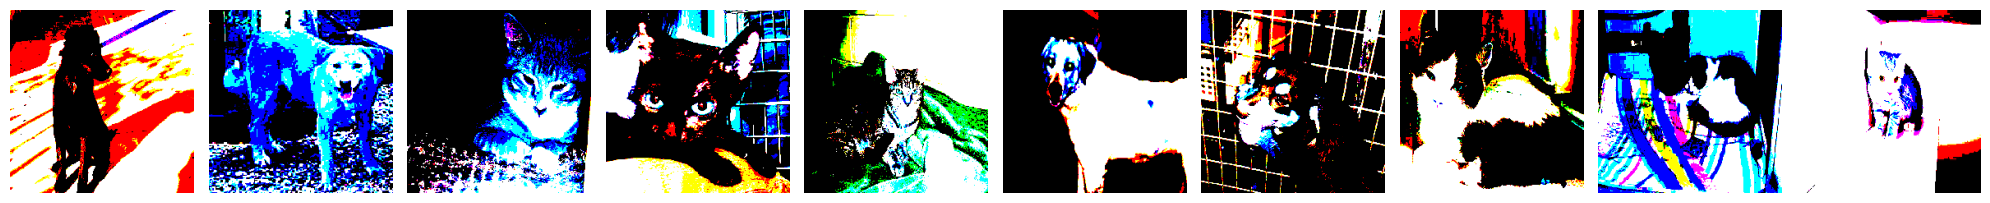

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [52]:
plotImages(imgs)
print(labels)

### Budowanie i trenowanie CNN

In [53]:

# Tworzenie modelu sekwencyjnego z wykorzystaniem obiektu Input jako pierwszej warstwy
model = Sequential([
    # Dodanie warstwy Input określającej kształt wejściowy
    Input(shape=(224, 224, 3)),
    # Dodanie pierwszej warstwy konwolucyjnej bez podawania input_shape
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    # Dodanie warstwy MaxPooling
    MaxPool2D(pool_size=(2, 2), strides=2),
    # Dodanie drugiej warstwy konwolucyjnej
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    # Dodanie kolejnej warstwy MaxPooling
    MaxPool2D(pool_size=(2, 2), strides=2),
    # Spłaszczenie danych przed przekazaniem do warstwy Dense
    Flatten(),
    # Dodanie warstwy Dense z dwoma jednostkami wyjściowymi i funkcją aktywacji softmax
    Dense(units=2, activation='softmax'),
])

# Zamiast definiować `input_shape` w pierwszej warstwie `Conv2D`, używamy `Input`, co jest zalecane.

In [54]:
# Podsumowanie modelu
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │       401,410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,802 (1.61 MB)

 Trainable params: 420,802 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Kompilacja modelu z określeniem optymalizatora, funkcji straty i metryk
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Trenowanie modelu z określeniem danych treningowych, walidacyjnych, liczby epok i trybu wyświetlania
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/opt/anaconda3/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


100/100 - 7s - 72ms/step - accuracy: 0.5490 - loss: 18.7125 - val_accuracy: 0.5800 - val_loss: 6.2893
Epoch 2/10
100/100 - 7s - 68ms/step - accuracy: 0.7680 - loss: 2.1148 - val_accuracy: 0.6200 - val_loss: 3.7484
Epoch 3/10
100/100 - 7s - 69ms/step - accuracy: 0.9190 - loss: 0.3842 - val_accuracy: 0.6350 - val_loss: 3.1322
Epoch 4/10
100/100 - 7s - 69ms/step - accuracy: 0.9700 - loss: 0.1158 - val_accuracy: 0.6200 - val_loss: 3.1820
Epoch 5/10
100/100 - 7s - 70ms/step - accuracy: 0.9890 - loss: 0.0321 - val_accuracy: 0.6050 - val_loss: 3.4993
Epoch 6/10
100/100 - 7s - 69ms/step - accuracy: 0.9940 - loss: 0.0127 - val_accuracy: 0.6250 - val_loss: 2.8474
Epoch 7/10
100/100 - 7s - 69ms/step - accuracy: 1.0000 - loss: 8.5135e-04 - val_accuracy: 0.6250 - val_loss: 2.8211
Epoch 8/10


### Predict (Przewidywanie)

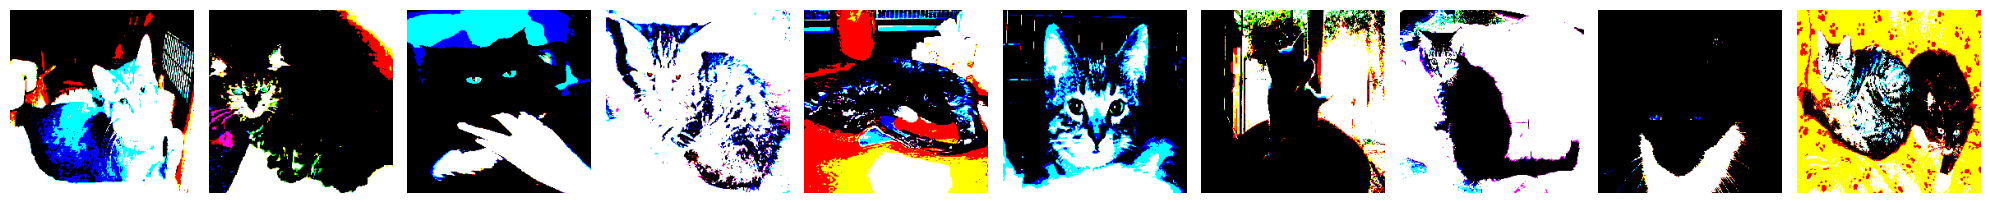

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [55]:
# Pobieranie jednego batcha obrazów i etykiet z danych testowych
test_imgs, test_labels = next(test_batches)
# Wyświetlanie obrazów z testowego batcha
plotImages(test_imgs)
# Wydrukowanie etykiet obrazów z testowego batcha
print(test_labels)

In [56]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [57]:
# Przewidywanie klas na podstawie obrazów z testowego batcha
predictions = model.predict(x=test_batches, verbose=0)

In [58]:
# Zaokrąglenie przewidywań do najbliższej liczby całkowitej
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [59]:
# Tworzenie macierzy pomyłek do analizy dokładności przewidywań
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Macierz pomyłek',
                          cmap=plt.cm.Blues):
    """
    Ta funkcja drukuje i rysuje macierz pomyłek.
    Normalizację można zastosować ustawiając `normalize=True`.
    """

    # Rysuje macierz pomyłek jako obraz w kolorach określonych przez mapę kolorów 'cmap'.
    # 'interpolation' ustawione na 'nearest' zapobiega jakimkolwiek próbom interpolacji między punktami.
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Ustawia tytuł wykresu. Tytuł pojawia się nad macierzą pomyłek.
    plt.title(title)
    
    # Dodaje pasek kolorów po prawej stronie wykresu, który pokazuje zależność między wartościami macierzy a kolorami.
    plt.colorbar()
    
    # Tworzy listę indeksów od 0 do liczby klas - używane do oznaczania podziałek na osiach X i Y.
    tick_marks = np.arange(len(classes))
    
    # Ustawia etykiety na osi X (poziomej) z listy 'classes', obracając je o 45 stopni dla lepszej czytelności.
    plt.xticks(tick_marks, classes, rotation=45)
    
    # Ustawia etykiety na osi Y (pionowej) z listy 'classes'.
    plt.yticks(tick_marks, classes)

    # Jeśli ustawiono normalizację, skaluje wartości w macierzy do zakresu 0-1.
    if normalize:
        # Normalizacja polega na podzieleniu każdej wartości wiersza przez sumę tego wiersza, 
        # co przekształca liczby w prawdopodobieństwa klasyfikacji dla każdej klasy.
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Znormalizowana macierz pomyłek")
    else:
        print('Macierz pomyłek bez normalizacji')

    # Drukuje macierz pomyłek w konsoli, co jest przydatne do analizy tekstowej.
    print(cm)

    # Ustala próg koloru tekstu na macierzy w zależności od maksymalnej wartości w macierzy.
    # Tekst będzie biały, jeśli wartość jest wyższa niż połowa maksymalnej wartości, w przeciwnym razie czarny.
    thresh = cm.max() / 2.
    
    # Iteruje przez wszystkie elementy macierzy (indeksy i wartości)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Dodaje wartości do każdej komórki macierzy. 'format' kontroluje, jak wartości są formatowane (np. 2 miejsca po przecinku).
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",  # Tekst wyśrodkowany w komórce
                 color="white" if cm[i, j] > thresh else "black")  # Warunek koloru tekstu

    # Ajustuje układ, aby zapewnić, że wszystko jest czytelne i nic się nie nakłada.
    plt.tight_layout()
    
    # Dodaje etykiety dla osi Y, opisującą co reprezentują wartości na tej osi.
    plt.ylabel('Prawdziwa etykieta')
    
    # Dodaje etykiety dla osi X, opisującą co reprezentują wartości na tej osi.
    plt.xlabel('Przewidywana etykieta')


In [61]:
# Pobieranie indeksów klas z batcha testowego
test_batches.class_indices

{'cat': 0, 'dog': 1}

Macierz pomyłek bez normalizacji
[[34 16]
 [14 36]]


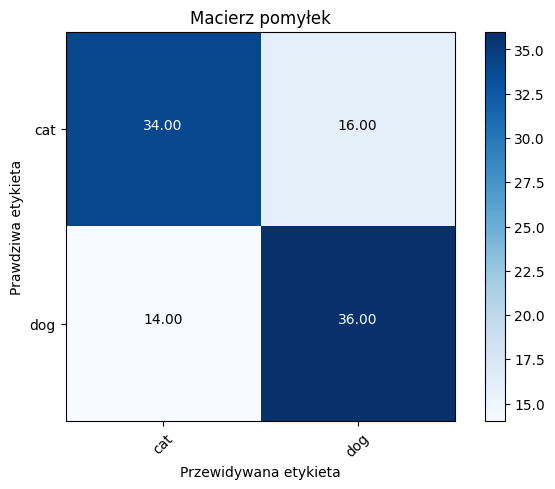

In [62]:
# Definiowanie etykiet do wyświetlenia w macierzy pomyłek
cm_plot_labels = ['cat', 'dog']

# Rysowanie macierzy pomyłek z odpowiednimi etykietami i tytułem
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Macierz pomyłek')
